                                                               Independent Component Analysis - ML                                                                

# Independent Component Analysis - ML

Independent Component Analysis (ICA) is a technique used to separate mixed signals into their independent, non-Gaussian components. Its aim to find a linear transformation of data that maximizes statistical independence among the components. ICA is widely used in fields like audio, image processing and biomedical signal analysis to isolate distinct sources from mixed signals.

## Statistical Independence Concept

Statistical independence refers to the idea that two random variables: X and Y are independent if knowing one does not affect the probability of the other. Mathematically, this means the joint probability of X and Y is equal to the product of their individual probabilities.

P(X, Y) = P(X) * P(Y)

In the context of ICA, we want to find a transformation that makes the components as independent as possible. This is often achieved by maximizing a measure of non-Gaussianity such as kurtosis or negentropy.

**Assumptions in ICA**

ICA operates under two key assumptions:

* The source signals are statistically independent of each other.
* The source signals have non-Gaussian distributions.

These assumptions allow ICA to effectively separate mixed signals into independent components, a task that traditional methods like PCA cannot achieve

## Mathematical Representation of ICA

Mathematically, ICA can be represented as follows:
X = AS

Where:
* X is the observed data matrix (mixed signals).
* A is the mixing matrix that combines the independent components.
* S is the source matrix containing the independent components.

The goal of ICA is to estimate the unmixing matrix W such that:
S = WX

## Cocktail Party Problem in ICA

The cocktail party problem is a classic example of ICA where the task is to separate individual voices from a mixture of sounds in a noisy environment. Imagine being at a cocktail party where multiple conversations are happening simultaneously. The goal is to isolate each person's voice from the background noise.

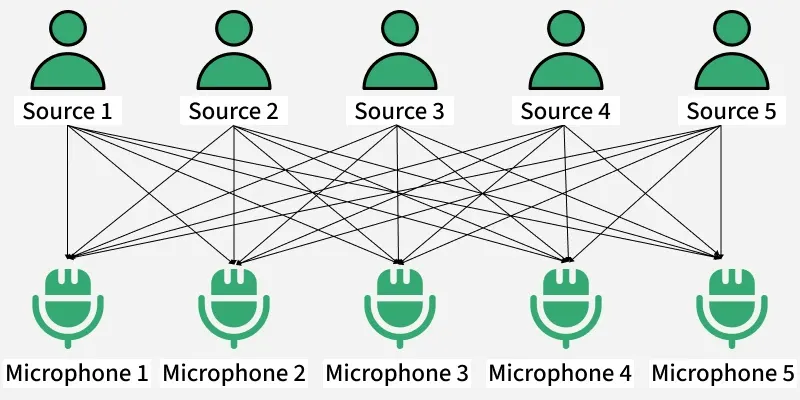

* There is 'n' number of speakers in that room and they are speaking simultaneously at the party.
* In the same room, there are also 'n' microphones placed at different distances from the speakers which are recording 'n' speakers' voice signals.

* Each microphone captures a mixture of all the speakers' voices, resulting in 'n' mixed signals.
* The task is to separate the individual voices from these mixed signals using ICA.


## Implementing ICA in Python

FastICA is a specific implementation of the Independent Component Analysis (ICA) algorithm that is designed for efficiency and speed.


In [1]:
# Import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Random Data with Missing signals

np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

signal_1 = np.sin(2 * time)
signal_2 = np.sign(np.sin(3 * time))
signal_3 = np.random.laplace(size=samples)

S = np.c_[signal_1, signal_2, signal_3]
S += 0.2 * np.random.normal(size=S.shape)

A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])
X = S.dot(A.T)

* signal_1: A sine wave like a tuning fork tone.
* signal_2: A square wave like a digital signal (on/off).
* signal_3: A random noise signal using the Laplace distribution which has sharper peaks than normal distribution.
* np.c_[]: Combine all three 1D signals into a single 2D array.
* 0.2 is the standard deviation of the noise

In [3]:
## Apply ICA to unmix the signals
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

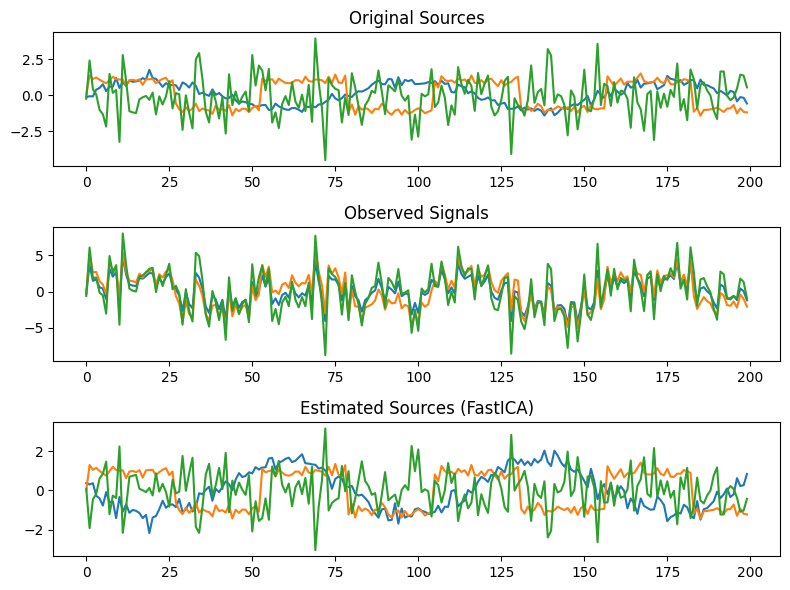

In [4]:
# Visualize the signals

plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()

We create three subplots:

* First shows the original synthetic signals
* Second displays the observed mixed signals
* Third shows the estimated independent sources obtained from ICA

## Advantages and Limitations of ICA

Advantages:
* ICA can separate mixed signals into their independent components, which is not possible with PCA.
* It is effective in applications like audio source separation and image processing. 
   
Limitations:

* ICA assumes that the source signals are statistically independent and non-Gaussian, which may not always hold true in real-world data.
* It can be sensitive to noise and outliers, which can affect the quality of the separation.

                                                                 Blind source separation using FastICA in Scikit Learn                                
                                         

# Blind source separation using FastICA in Scikit Learn
